In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitudes and longitudes
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the lats and lngs to a list
coords = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on lat and lng
from citipy import citipy

In [6]:
# Create a list for holding the cities nearest the randomly generated coords
cities = []

for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name

    # Only add the city if it's not already in the list
    if city not in cities:
        cities.append(city)

len(cities)

600

In [7]:
# Load dependency and key for upcoming API call
import requests
from datetime import datetime
from config import weather_api_key

In [8]:
# Set up initial URL and counters
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=' + weather_api_key
# data = requests.get(query_url).json()
# data
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through each city in the cities array and pull data using API
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0) & (i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL for each city
    query_url = url + '&q=' + city.replace(' ', '+')

    #Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse out the needed data
        city_weather = requests.get(query_url).json()
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert time to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city data
        city_data.append({
                        'City': city.title(),
                        'Lat': city_lat,
                        'Lng': city_lng,
                        'Max Temp': city_max_temp,
                        'Humidity': city_humidity,
                        'Clouds': city_clouds,
                        'Wind': city_wind,
                        'Country': city_country,
                        'Date': city_date
        })
    except:
        print(city + ' not found. Skipping...')
        continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kuching
Processing Record 2 of Set 1 | sattahip
Processing Record 3 of Set 1 | charters towers
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | la plata
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | yantai
Processing Record 10 of Set 1 | illoqqortoormiut
illoqqortoormiut not found. Skipping...
Processing Record 11 of Set 1 | port macquarie
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | belushya guba
belushya guba not found. Skipping...
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | san carlos de bariloche
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | moerai
Processing Record 19 of Set 1 | otane
Processing Record 20 of Set 1 | karratha
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | east london
Proc

In [10]:
len(city_data)

542

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,Kuching,1.5500,110.3333,80.82,83,20,6.91,MY,2021-09-11 01:32:57
1,Sattahip,12.6664,100.9007,82.49,78,40,5.75,TH,2021-09-11 01:29:08
2,Charters Towers,-20.1000,146.2667,77.05,49,75,16.49,AU,2021-09-11 01:32:58
3,Bluff,-46.6000,168.3333,44.80,68,90,19.80,NZ,2021-09-11 01:32:58
4,Ushuaia,-54.8000,-68.3000,37.06,81,20,0.00,AR,2021-09-11 01:30:44
5,La Plata,-34.9215,-57.9545,58.77,96,11,4.94,AR,2021-09-11 01:30:03
6,Kapaa,22.0752,-159.3190,84.52,68,20,5.01,US,2021-09-11 01:32:59
7,Vaini,-21.2000,-175.2000,78.96,78,20,6.91,TO,2021-09-11 01:32:59
8,Yantai,37.5333,121.4000,78.62,73,10,11.18,CN,2021-09-11 01:32:59
9,Port Macquarie,-31.4333,152.9167,78.76,40,0,8.79,AU,2021-09-11 01:28:00


In [12]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Clouds', 'Wind']]
city_data_df = city_data_df.rename(columns={'Clouds': 'Cloudiness', 'Wind': 'Wind Speed'})
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kuching,MY,2021-09-11 01:32:57,1.5500,110.3333,80.82,83,20,6.91
1,Sattahip,TH,2021-09-11 01:29:08,12.6664,100.9007,82.49,78,40,5.75
2,Charters Towers,AU,2021-09-11 01:32:58,-20.1000,146.2667,77.05,49,75,16.49
3,Bluff,NZ,2021-09-11 01:32:58,-46.6000,168.3333,44.80,68,90,19.80
4,Ushuaia,AR,2021-09-11 01:30:44,-54.8000,-68.3000,37.06,81,20,0.00
5,La Plata,AR,2021-09-11 01:30:03,-34.9215,-57.9545,58.77,96,11,4.94
6,Kapaa,US,2021-09-11 01:32:59,22.0752,-159.3190,84.52,68,20,5.01
7,Vaini,TO,2021-09-11 01:32:59,-21.2000,-175.2000,78.96,78,20,6.91
8,Yantai,CN,2021-09-11 01:32:59,37.5333,121.4000,78.62,73,10,11.18
9,Port Macquarie,AU,2021-09-11 01:28:00,-31.4333,152.9167,78.76,40,0,8.79


In [13]:
# Create an output file (CSV)
file_to_save = 'weather_data/cities.csv'

# Export the city data into a CSV
city_data_df.to_csv(file_to_save, index_label='City_ID')

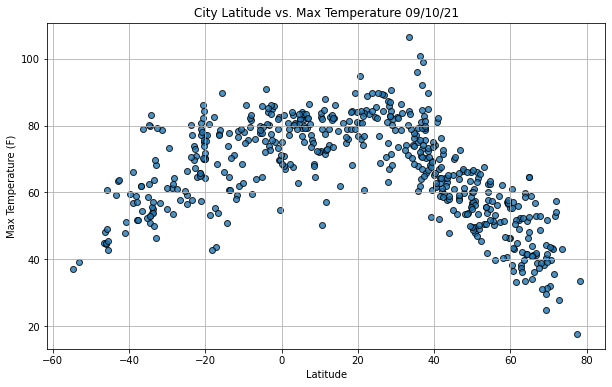

In [14]:
# Import dependency for visualizations
import time
plt.subplots(figsize=(10,6))
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'], 
            edgecolor='k', linewidths=1, marker='o', alpha=0.8, label='Cities'
            )
plt.title('City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('weather_data/Fig1.png')
plt.grid()

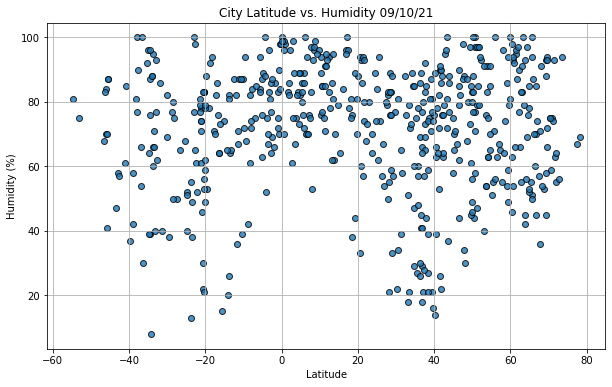

In [15]:
plt.subplots(figsize=(10,6))
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], 
            edgecolor='k', linewidths=1, marker='o', alpha=0.8, label='Cities'
            )
plt.title('City Latitude vs. Humidity ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('weather_data/Fig2.png')
plt.grid()

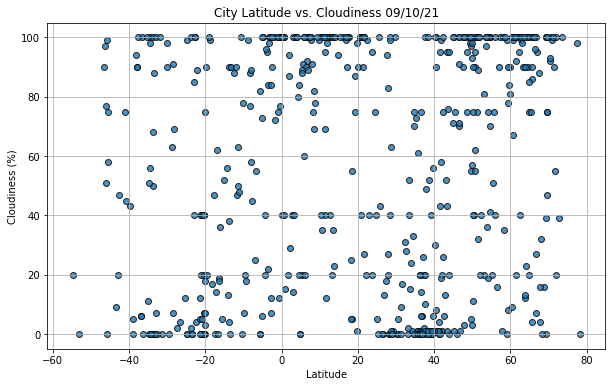

In [16]:
plt.subplots(figsize=(10,6))
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], 
            edgecolor='k', linewidths=1, marker='o', alpha=0.8, label='Cities'
            )
plt.title('City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('weather_data/Fig3.png')
plt.grid()

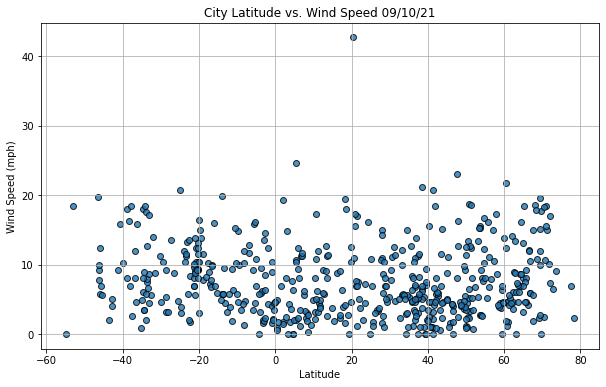

In [17]:
plt.subplots(figsize=(10,6))
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'], 
            edgecolor='k', linewidths=1, marker='o', alpha=0.8, label='Cities'
            )
plt.title('City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('weather_data/Fig4.png')
plt.grid()

In [18]:
# import function dependency
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (m, b, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculation the regression line y-values
    regress_values = m * x_values + b

    # Get the equation of the line
    line_eq = 'y = '  + str(round(m, 2)) + 'x + ' + str(round(b, 2))

    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    plt.annotate(line_eq, text_coordinates, fontsize=15, c='r')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)


In [20]:
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

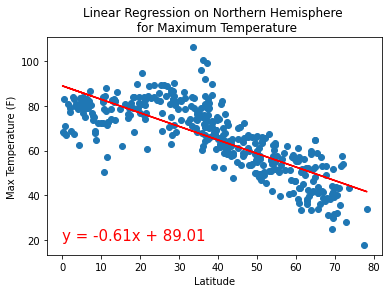

In [25]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Linear Regression on Northern Hemisphere \n for Maximum Temperature', 'Max Temperature (F)', (0, 20))

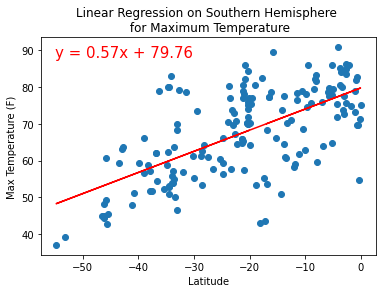

In [32]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Linear Regression on Southern Hemisphere \n for Maximum Temperature', 'Max Temperature (F)', (-55, 88))

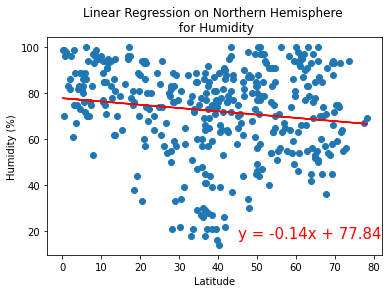

In [34]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Linear Regression on Northern Hemisphere \n for Humidity', 'Humidity (%)', (45, 17))

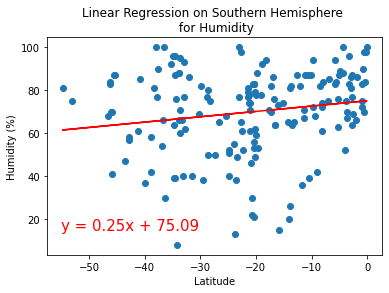

In [36]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Linear Regression on Southern Hemisphere \n for Humidity', 'Humidity (%)', (-55, 15))

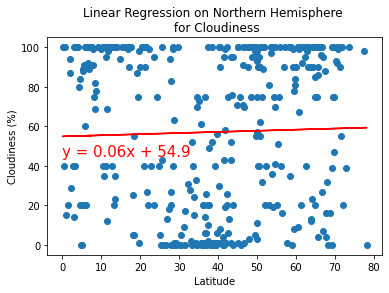

In [39]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Linear Regression on Northern Hemisphere \n for Cloudiness', 'Cloudiness (%)', (0, 45))

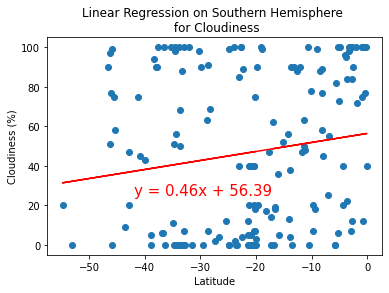

In [42]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Linear Regression on Southern Hemisphere \n for Cloudiness', 'Cloudiness (%)', (-42, 25))

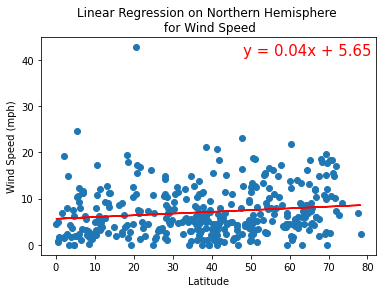

In [45]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Linear Regression on Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (48, 41))

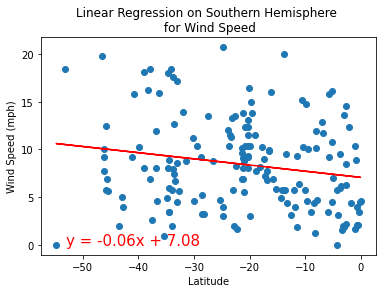

In [51]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Linear Regression on Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (-53, 0))